In [1]:
# -*- coding: utf-8 -*-
"""BrainTumorClassification.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1b6Y7XKH95Y4SveTxxCGufDKhbv7FOKxK
"""

import numpy as np
import pandas as pd
import collections
import os 
import zipfile 
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std
from tensorflow.keras import models
from keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten ,Conv2D ,MaxPool2D ,BatchNormalization ,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

from PIL import Image
from os import listdir
from matplotlib import image
image, label = [], []
Dataset='/content/drive/MyDrive/DATA7703/Tumor/Testing/'
subfolders = sorted([file.path for file in os.scandir(Dataset) if file.is_dir()])
for idx, folder in enumerate(subfolders):
    for file in sorted(os.listdir(folder)):
        img = tf.keras.preprocessing.image.load_img(folder+"/"+file, color_mode='rgb', target_size=(224,224),interpolation='lanczos')
        img = tf.keras.preprocessing.image.img_to_array(img).astype('float32')
        image.append(img)
        label.append(idx)
Data_x_test = np.array(image) 
Data_y_test = np.array(label)

image, label = [], []
Dataset='/content/drive/MyDrive/DATA7703/Tumor/Training/'
subfolders = sorted([file.path for file in os.scandir(Dataset) if file.is_dir()])
for idx, folder in enumerate(subfolders):
    for file in sorted(os.listdir(folder)):
        img = tf.keras.preprocessing.image.load_img(folder+"/"+file, color_mode='rgb', target_size=(224,224),interpolation='lanczos')
        img = tf.keras.preprocessing.image.img_to_array(img).astype('float32')
        image.append(img)
        label.append(idx)
Data_x_train = np.array(image) 
Data_y_train = np.array(label)

import seaborn as sns
categories=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
test= []
l= len (Data_y_train)
for i in range(l):
   test.append(categories[Data_y_train[i]])
sns.countplot( test)

Data_x_train.shape

import cv2
categories=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    #img = cv2.imread(data_dir + fileNames[i])
    #img = cv2.resize(img, (new_size, new_size))
    plt.imshow(Data_x_train[i].astype('uint8'))
    plt.title(categories[Data_y_train[i]])

IMG_SIZE = 200

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

def preprocess_img ( image , label):
    preprocessed_image = resize_and_rescale(image)
    preprocessed_label = tf.one_hot(label,4)
    return preprocessed_image , preprocessed_label

X_train, X_test, y_train, y_test = train_test_split( Data_x_train,Data_y_train, test_size=0.3, random_state=42)

preprocessed_image , preprocessed_label = preprocess_img(X_train , y_train)
preprocessed_image_val , preprocessed_label_val = preprocess_img(X_test , y_test)

preprocessed_image.shape

model1 = models.Sequential()
model1.add(Conv2D(filters=64, kernel_size=3, padding= 'Same', activation='relu', input_shape=(preprocessed_image.shape[1],preprocessed_image.shape[2],3)))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(filters=128, kernel_size=3, padding= 'Same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())


model1.add(Flatten())
#  model1.add(Dense(1024, activation = "relu"))
#  model1.add(Dropout(0.2))



model1.add(Dense(512, activation = "relu"))
model1.add(Dropout(0.2))

model1.add(Dense(4, activation = "softmax"))

model1.compile (
      loss = 'categorical_crossentropy',
      optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
      metrics = ['accuracy']
        )


es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model1.fit(preprocessed_image,preprocessed_label,batch_size=64 ,epochs=60 ,callbacks=[es] ,validation_data= (preprocessed_image_val, preprocessed_label_val)
)

model1.save('my_model_test.h5')

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

preprocessed_image , preprocessed_label = preprocess_img(Data_x_test , Data_y_test)

# evaluate model
acc = model1.evaluate(preprocessed_image, preprocessed_label)
y_pred= model1.predict (preprocessed_image)
y_pred=tf.one_hot(tf.argmax(y_pred,1),4)
print("y_pred",y_pred)
print("y_true", preprocessed_label)

# stores scores

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Epoch 1/60


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f76cf07f320> (for post_execute):


KeyboardInterrupt: ignored

In [5]:
from keras.models import load_model
model_x = load_model('my_model.h5')
model_x.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 128)       512       
_________________________________________________________________
flatten (Flatten)            (None, 320000)           

In [ ]:
import numpy as np
import os
import PIL
from PIL import Image
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Reshape
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_generator(shape, z_dim):
    #Create Generator
    activator = 'tanh'
    alpha_val = 0.01
    model = Sequential()
    model.add(Dense(128, input_dim=z_dim))
    model.add(LeakyReLU(alpha=alpha_val))
    model.add(Dense(512 * 512 * 3, activation=activator))
    model.add(Reshape(shape))

    return model

def build_discriminator(shape):
    #Create Discriminator
    activator = 'sigmoid'
    alpha_val = 0.01
    model = Sequential()
    model.add(Flatten(input_shape=shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=alpha_val))
    model.add(Dense(1, activation=activator))

    return model

def build_gan(generator, discriminator):

    model = Sequential()

    # Combined Generator -> Discriminator model
    model.add(generator)
    model.add(discriminator)

    return model
  
def train(iterations, batch_size, sample_interval):

    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        #Train the Discriminator
        idx = np.random.randint(0, image_dataset.shape[0], batch_size)
        imgs = image_dataset[idx]

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        #Train Generator 
        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)
        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output results
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

def create_images(generator, image_grid_rows=1, image_grid_columns=1):

    # add noise
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))
    gen_imgs = generator.predict(z)
    gen_imgs = 0.5 * gen_imgs + 0.5
    
    
    return gen_imgs[0,:,:,0]



50 [D loss: 221.011333, acc.: 22.00%] [G loss: 89.298553]
100 [D loss: 3.722478, acc.: 96.00%] [G loss: 85.985275]
150 [D loss: 0.641775, acc.: 95.00%] [G loss: 74.661659]
200 [D loss: 0.025935, acc.: 98.00%] [G loss: 50.819550]
250 [D loss: 4.120441, acc.: 97.00%] [G loss: 355.660950]
300 [D loss: 0.120208, acc.: 98.00%] [G loss: 49.673206]
350 [D loss: 0.322953, acc.: 97.00%] [G loss: 62.923134]
400 [D loss: 0.049440, acc.: 97.00%] [G loss: 13.985574]
450 [D loss: 0.102705, acc.: 99.00%] [G loss: 38.141285]
500 [D loss: 0.000034, acc.: 100.00%] [G loss: 33.947330]
batch_size: 50
50 [D loss: 0.310783, acc.: 94.50%] [G loss: 1.820007]
100 [D loss: 0.445749, acc.: 93.50%] [G loss: 15.348681]
150 [D loss: 0.001441, acc.: 100.00%] [G loss: 10.662252]
200 [D loss: 1.202943, acc.: 61.50%] [G loss: 7.163771]
250 [D loss: 0.020356, acc.: 99.50%] [G loss: 5.071859]
300 [D loss: 0.001246, acc.: 100.00%] [G loss: 21.840631]
350 [D loss: 0.062364, acc.: 100.00%] [G loss: 2.740064]
400 [D loss: 0.

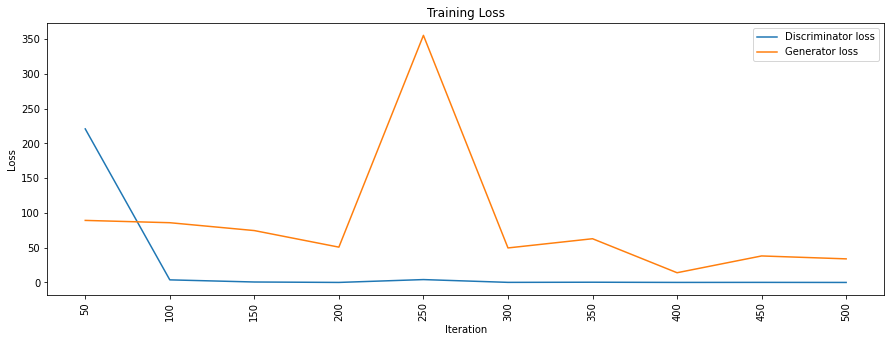

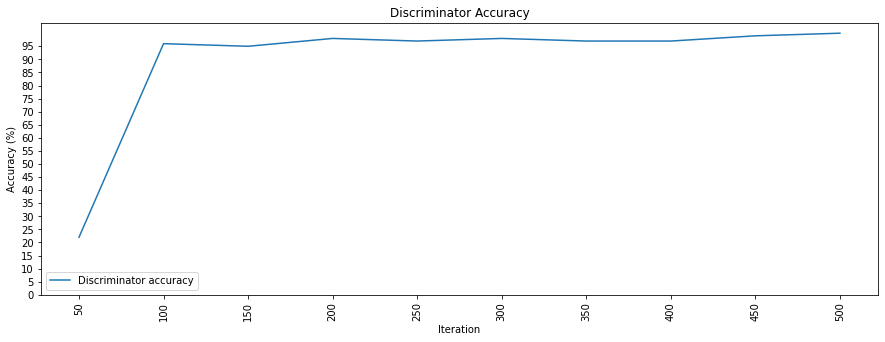

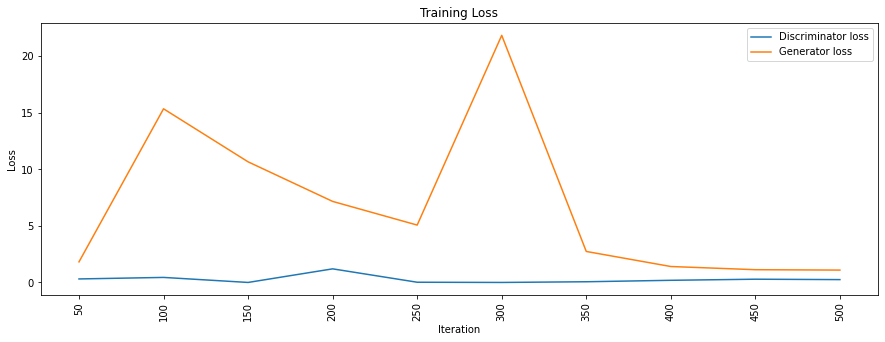

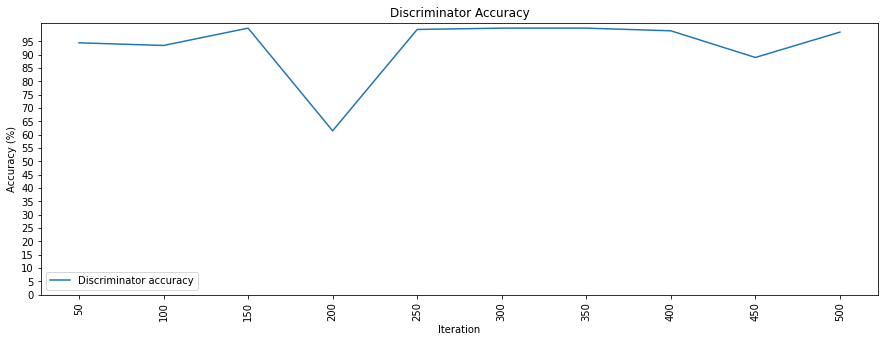

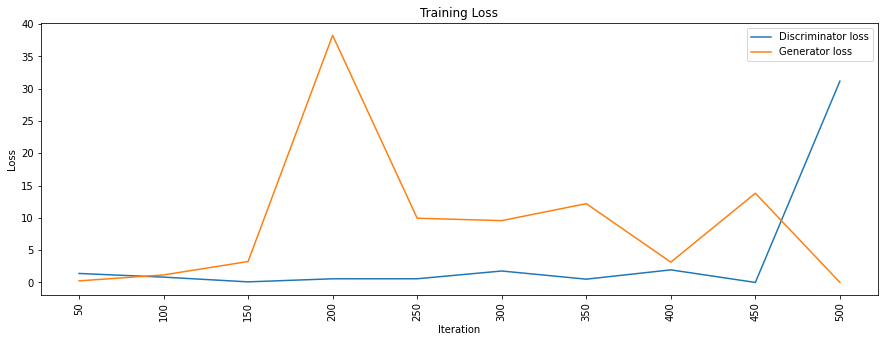

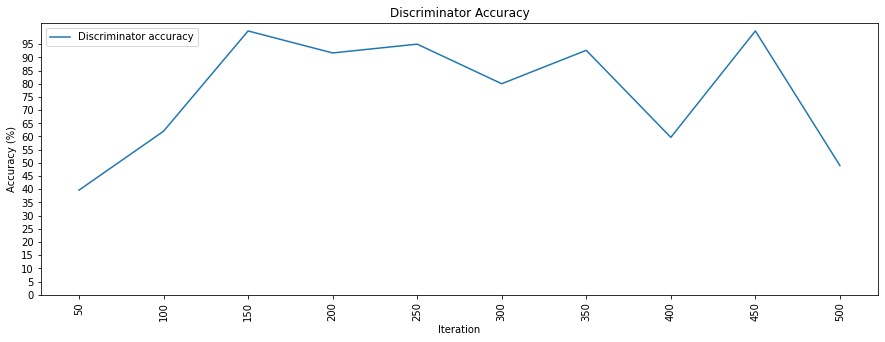

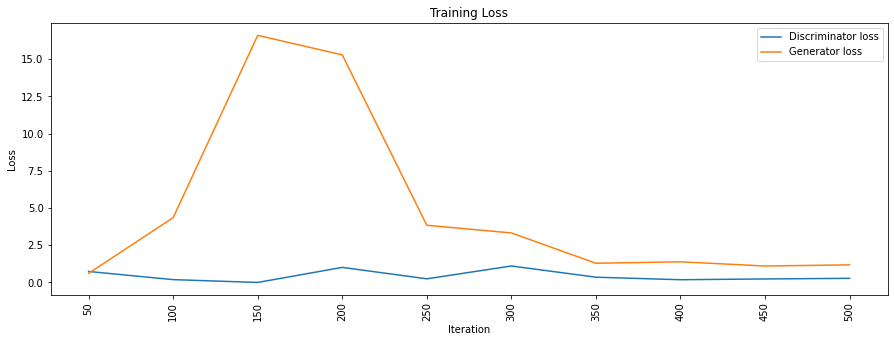

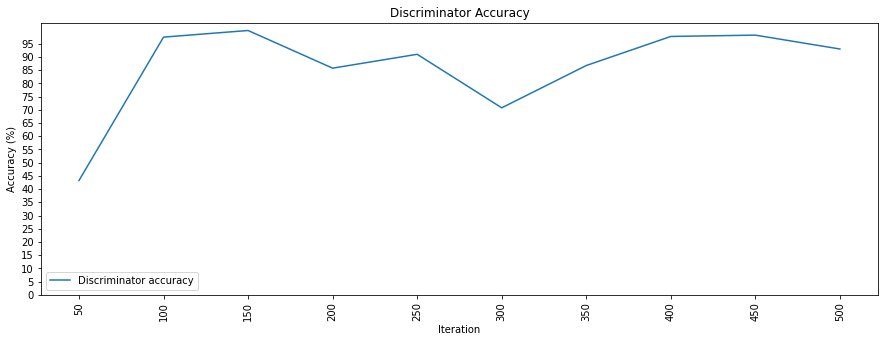

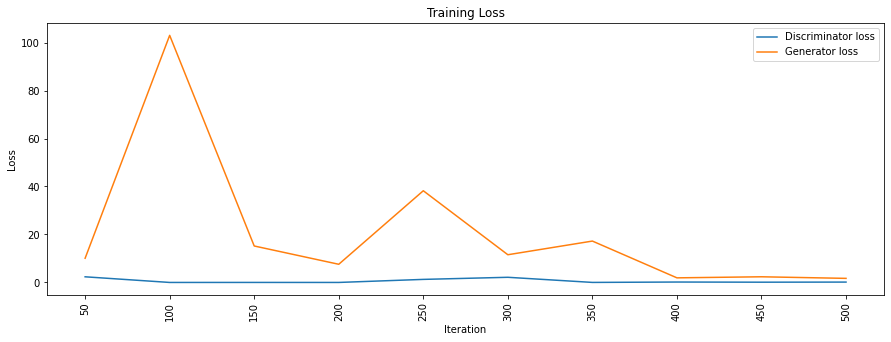

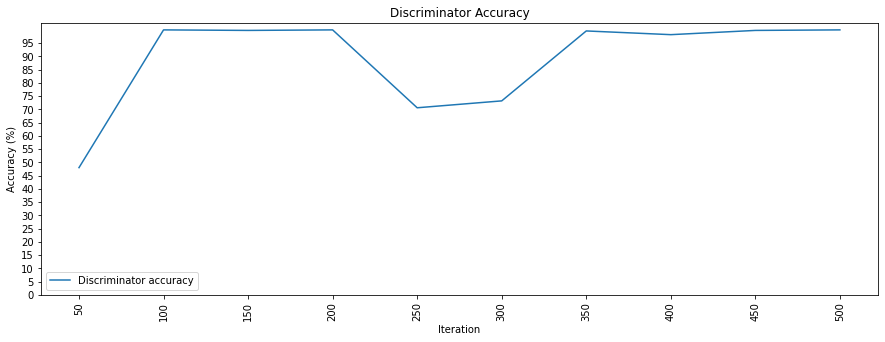

In [ ]:
#Hyper Param Tuning (DONT RUN UNLESS HYPER PARAM TUNING)

directories = [r'/content/drive/MyDrive/DATA7703/Tumor/Testing/glioma_tumor'
                              
               ]

    
generator_list = []
for img_directory in directories:
    img_size = 512
    img_channels = 3
    img_directory = img_directory
    image_dataset = []
    
    for filename in os.listdir(img_directory):
        path = os.path.join(img_directory, filename)
        image = Image.open(path).resize((img_size, img_size), Image.ANTIALIAS)
        image_dataset.append(np.asarray(image))

    image_dataset = np.reshape(
        image_dataset, (-1, img_size, img_size, img_channels))
    image_dataset = image_dataset / 127.5 - 1
    
    
    img_rows = 512
    img_cols = 512
    channels = 3

    # Input image dimensions
    img_shape = (img_rows, img_cols, channels)

    # Size of the noise vector, used as input to the Generator
    z_dim = 100
    
    

    
    # Set hyperparameters (batch_size)

    for i in range(50,300,50):
        
        # Build and compile the Discriminator
        discriminator = build_discriminator(img_shape)
        discriminator.compile(loss='binary_crossentropy',
                              optimizer=Adam(),
                              metrics=['accuracy'])

        # Build the Generator
        generator = build_generator(img_shape, z_dim)

        # Keep Discriminator’s parameters constant for Generator training
        discriminator.trainable = False

        # Build and compile GAN model with fixed Discriminator to train the Generator
        gan = build_gan(generator, discriminator)
        gan.compile(loss='binary_crossentropy', optimizer=Adam())
        
        iterations = 500
        batch_size = i
        sample_interval = 50
        losses = []
        accuracies = []
        iteration_checkpoints = []

        # Train the GAN for the specified number of iterations
        train(iterations, batch_size, sample_interval)
        
        print('batch_size:', i)
        
        losses = np.array(losses)
        
        # Plot training losses for Discriminator and Generator
        plt.figure(figsize=(15, 5))
        plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
        plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

        plt.xticks(iteration_checkpoints, rotation=90)

        plt.title("Training Loss")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.legend()

        
        accuracies = np.array(accuracies)

        # Plot Discriminator accuracy
        plt.figure(figsize=(15, 5))
        plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

        plt.xticks(iteration_checkpoints, rotation=90)
        plt.yticks(range(0, 100, 5))

        plt.title("Discriminator Accuracy")
        plt.xlabel("Iteration")
        plt.ylabel("Accuracy (%)")
        plt.legend()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

directories = [r'/content/drive/MyDrive/DATA7703/Tumor/Testing/glioma_tumor',
          r'/content/drive/MyDrive/DATA7703/Tumor/Testing/meningioma_tumor',
          r'/content/drive/MyDrive/DATA7703/Tumor/Testing/no_tumor',
          r'/content/drive/MyDrive/DATA7703/Tumor/Testing/pituitary_tumor'   
        ]

    
generator_list = []
for img_directory in directories:
    img_size = 512
    img_channels = 3
    img_directory = img_directory
    image_dataset = []
    
    for filename in os.listdir(img_directory):
        path = os.path.join(img_directory, filename)
        image = Image.open(path).resize((img_size, img_size), Image.ANTIALIAS)
        image_dataset.append(np.asarray(image))

    image_dataset = np.reshape(
        image_dataset, (-1, img_size, img_size, img_channels))
    image_dataset = image_dataset / 127.5 - 1
    
    
    img_rows = 512
    img_cols = 512
    channels = 3

    # Input image dimensions
    img_shape = (img_rows, img_cols, channels)

    # noise
    z_dim = 100
    iterations = 200
    batch_size = 128
    sample_interval = 200
    losses = []
    accuracies = []
    iteration_checkpoints = []

    # Build and compile the Discriminator
    discriminator = build_discriminator(img_shape)
    discriminator.compile(loss='binary_crossentropy',
                          optimizer=Adam(),
                          metrics=['accuracy'])

    # Build the Generator
    generator = build_generator(img_shape, z_dim)
    discriminator.trainable = False

    gan = build_gan(generator, discriminator)
    gan.compile(loss='binary_crossentropy', optimizer=Adam())
    
    train(200, 100, 200)
    generator_list.append(generator)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
200 [D loss: 0.306634, acc.: 93.00%] [G loss: 28.926739]
200 [D loss: 3.135612, acc.: 98.50%] [G loss: 810.069580]
200 [D loss: 0.053469, acc.: 99.50%] [G loss: 28.147863]
200 [D loss: 15.946326, acc.: 48.00%] [G loss: 60.261333]


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               12928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 786432)            101449728 
_________________________________________________________________
reshape (Reshape)            (None, 512, 512, 3)       0         
Total params: 101,462,656
Trainable params: 101,462,656
Non-trainable params: 0
_________________________________________________________________
None


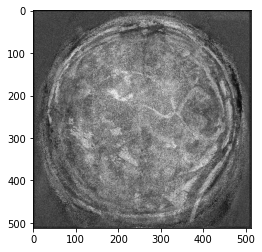

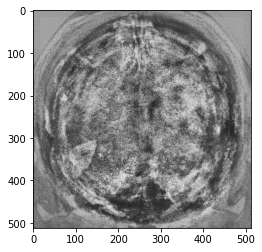

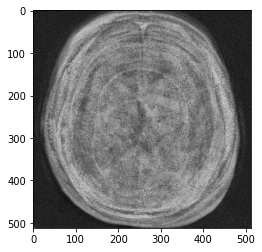

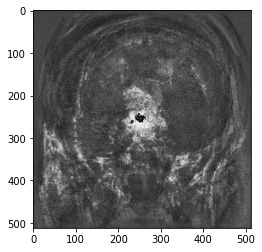

In [ ]:
#Generate Images

glicoma_gen = generator_list[0]
meningioma_gen = generator_list[1]
no_tumor_gen = generator_list[2]
pituitary_gen = generator_list[3]

print(glicoma_gen.summary())

glicoma_images = []
meningioma_images = []
no_tumor_images = []
pituitary_images = []

#x = create_images(glicoma_gen)
#imgplot = plt.imshow(x)
#plt.show()


for i in range(0,1):
    glicoma_images.append(create_images(glicoma_gen))
    meningioma_images.append(create_images(meningioma_gen))
    no_tumor_images.append(create_images(no_tumor_gen))
    pituitary_images.append(create_images(pituitary_gen))

g_img = glicoma_images[0]
m_img = meningioma_images[0]
n_img = no_tumor_images[0]
p_img = pituitary_images[0]


imgplot = plt.imshow(g_img, cmap='gray')
plt.show()


imgplot = plt.imshow(m_img, cmap='gray')
plt.show()



imgplot = plt.imshow(n_img,cmap='gray')
plt.show()


imgplot = plt.imshow(p_img, cmap='gray')
plt.show()

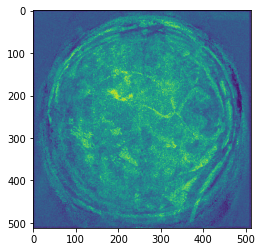

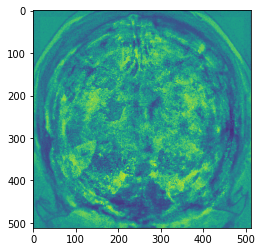

(512, 512, 1)


1

In [ ]:
imgplot = plt.imshow(g_img)
plt.show()

imgplot = plt.imshow(m_img)
plt.show()

image_test = tf.expand_dims(glicoma_images[0],2)
print(image_test.shape)
len(glicoma_images)

In [ ]:
glicoma_images[0].expand(image,1)
print(glicoma_images[0].shape)
len(glicoma_images)


"""save the images"""
glicoma_images=np.array(glicoma_images)
np.save('glicoma_images.npy',glicoma_images)

meningioma_images=np.array(meningioma_images)
np.save('meningioma_images.npy',meningioma_images)

no_tumor_images=np.array(no_tumor_images)
np.save('no_tumor_images.npy',no_tumor_images)

pituitary_images=np.array(pituitary_images)
np.save('pituitary_images.npy',pituitary_images)

(512, 512)


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

img_GAN = np.load('glicoma_images.npy')
img_GAN_list = img_GAN.tolist()


img_GAN[0].expand(image,1)


AttributeError: ignored

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
images_Names = ['glicoma_images.npy', 'meningioma_images.npy','no_tumor_images.npy','pituitary_images.npy']

x_train_GAN = []
y_train_GAN = []
"""
img_GAN = np.load('glicoma_images.npy')
img_GAN = img_GAN.tolist()
"""

for idx, image_file in enumerate(images_Names):
    img_GAN = np.load(image_file)
    img_GAN_list = img_GAN.tolist()
    del img_GAN
    for i in range(len(img_GAN_list)):
      new_img_array = tf.keras.preprocessing.image.img_to_array(img_GAN_list[i]).astype('float32')
      new_img_array = cv2.resize(new_img_array, (224, 224),interpolation=cv2.INTER_LANCZOS4)
      x_train_GAN.append(new_img_array)
      y_train_GAN.append(idx)


In [13]:
# evaluate model
"""
x_train_GAN = np.array(x_train_GAN)
x_train_GAN = x_train_GAN/255.0
x_train_GAN = x_train_GAN.reshape(-1,224,224,1)
y_train_GAN = np.array(y_train_GAN)
"""
import numpy as np
import pandas as pd
import collections
import os 
import zipfile 
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std
from tensorflow.keras import models
from keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten ,Conv2D ,MaxPool2D ,BatchNormalization ,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model
import tensorflow as tf

IMG_SIZE = 200
print(len(x_train_GAN))
x_train_GAN = np.array(x_train_GAN)
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

def preprocess_img ( image , label):
    preprocessed_image = resize_and_rescale(image)
    preprocessed_label = tf.one_hot(label,4)
    return preprocessed_image , preprocessed_label
x_train_GAN = x_train_GAN.reshape(-1,224,224,1)
preprocessed_image , preprocessed_label = preprocess_img(x_train_GAN , y_train_GAN)
print(preprocessed_image.shape)

acc = model_x.evaluate(preprocessed_image, preprocessed_label)
y_pred= model_x.predict(preprocessed_image)
y_pred= tf.one_hot(tf.argmax(y_pred,1),4)
print("y_pred",y_pred)
print("y_true", preprocessed_label)


1200
(1200, 200, 200, 1)


ValueError: ignored

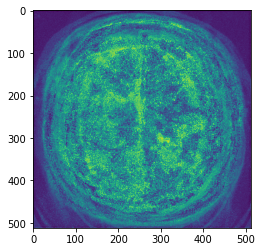

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

new_array = tf.keras.preprocessing.image.img_to_array(img_GAN[0]).astype('float32')

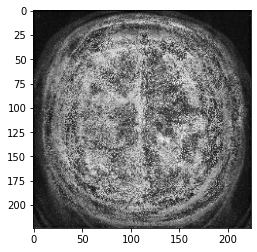

In [ ]:
import cv2
new_array = cv2.resize(new_array, (224, 224))
new_array.shape
plt.imshow(new_array, cmap='gray')

In [ ]:
from keras import backend as K
K.clear_session()

In [ ]:
from numba import cuda
cuda.select_device(0)
cuda.close()

In [ ]:
!apt install psmisc
!sudo fuser /dev/nvidia*
!kill -9 [pid]
!/opt/bin/nvidia-smi

Reading package lists... Done
Building dependency tree       
Reading state information... Done
psmisc is already the newest version (23.1-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/dev/nvidia0:        24021m
/dev/nvidiactl:      24021
/dev/nvidia-uvm:     24021
/bin/bash: line 0: kill: [pid]: arguments must be process or job IDs
Mon Oct 25 12:46:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 0000000

# 新增區段